# Finding the Two Best Markets to Advertise in an E-learning Product

In this project, we'll aim to find the two best markets to advertise our product in — we're working for an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc.



Understanding the Data¶
To avoid spending money on organizing a survey, we'll first try to make use of existing data to determine whether we can reach any reliable result.

One good candidate for our purpose is freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this GitHub repository. Below, we'll do a quick exploration of the 2017-fCC-New-Coders-Survey-Data.csv file stored in the clean-data folder of the repository we just mentioned. We'll read in the file using the direct link here.

In [3]:
#read in data
import pandas as pd
import numpy as np
survey_data=pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv")
pd.options.display.max_columns = 150 # to avoid truncated output 
print(survey_data.info())
print(survey_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB
None
    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Checking for Sample Representativity
As we mentioned in the introduction, most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

Where are these new coders located.<br>
What locations have the greatest densities of new coders.<br>
How much money they're willing to spend on learning.<rb>
So we first need to clarify whether the data set has the right categories of people for our purpose. The JobRoleInterest column describes for every participant the role(s) they'd be interested in working in. If a participant is interested in working in a certain domain, it means that they're also interested in learning about that domain. So let's take a look at the frequency distribution table of this column and determine whether the data we have is relevant.



In [37]:
print(survey_data["JobRoleInterest"].value_counts(normalize=True)*100)

Full-Stack Web Developer                                                                                                                                                                       11.770595
  Front-End Web Developer                                                                                                                                                                       6.435927
  Data Scientist                                                                                                                                                                                2.173913
Back-End Web Developer                                                                                                                                                                          2.030892
  Mobile Developer                                                                                                                                                                              1.67

In [38]:
print(survey_data["JobRoleInterest"].value_counts())


Full-Stack Web Developer                                                                                                                                                                       823
  Front-End Web Developer                                                                                                                                                                      450
  Data Scientist                                                                                                                                                                               152
Back-End Web Developer                                                                                                                                                                         142
  Mobile Developer                                                                                                                                                                             117
Game Developer           


The information in the table above is quite granular, but from a quick scan it looks like:

A lot of people are interested in web development (full-stack web development, front-end web development and back-end web development).
A few people are interested in mobile development.
A few people are interested in domains other than web and mobile development.
It's also interesting to note that many respondents are interested in more than one subject. It'd be useful to get a better picture of how many people are interested in a single subject and how many have mixed interests. Consequently, in the next code block, we'll:

Split each string in the JobRoleInterest column to find the number of options for each participant.
We'll first drop the null values because we can't split Nan values.
Generate a frequency table for the variable describing the number of options.

In [39]:
import numpy as np
job_role_interested=survey_data[survey_data["JobRoleInterest"].notna()]
print(job_role_interested.shape)

(6992, 136)


In [87]:
# Split each string in the 'JobRoleInterest' column
interests_no_nulls = survey_data['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')

# Frequency table for the var describing the number of options
n_of_options = splitted_interests.apply(lambda x: len(x)) # x is a list of job options
n_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

In [40]:
#developer=["Full-Stack Web Developer","Front-End Web Developer"
job_role_interested["JobRoleInterest"].str.contains("Web|Mobile",regex=True).value_counts()

True     6034
False     958
Name: JobRoleInterest, dtype: int64

It turns out that only 31.7% of the participants have a clear idea about what programming niche they'd like to work in, while the vast majority of students have mixed interests. But given that we offer courses on various subjects, the fact that new coders have mixed interest might be actually good for us.

The focus of our courses is on web and mobile development, so let's find out how many respondents chose at least one of these two options.



18175 people paticipated in survey in that only 6992 people answered the question for job role interested.Out of 6992 people 6034 people are interested in web and mobile development.

In [41]:
count=0
array=[]
for subject in job_role_interested["JobRoleInterest"]:
    new_subject=subject.split(',')
    array.append(new_subject)
one_subject_interested=0
more_than_one_subject_interested=0
for i in array:
    if len(i)>1:
        one_subject_interested+=1
    else:
        more_than_one_subject_interested+=1
max=0
for i in array:
    length=len(i)
    if length>max:
        max=length
print(more_than_one_subject_interested)
print(one_subject_interested)
print(max)
        

2213
4779
13


In [42]:
no_of_subjects_interest=pd.Series([one_subject_interested,more_than_one_subject_interested],index=["one_subject","more_than_one"])

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


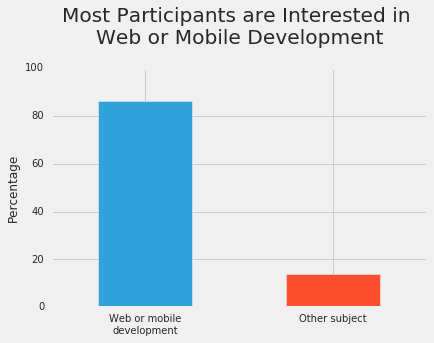

In [88]:
# Frequency table
web_or_mobile = interests_no_nulls.str.contains(
    'Web Developer|Mobile Developer') # returns an array of booleans
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

# Graph for the frequency table above
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()


It turns out that most people in this survey (roughly 86%) are interested in either web or mobile development. These figures offer us a strong reason to consider this sample representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

Now we need to figure out what are the best markets to invest money in for advertising our courses. We'd like to know:

Where are these new coders located.
What are the locations with the greatest number of new coders.
How much money new coders are willing to spend on learning.


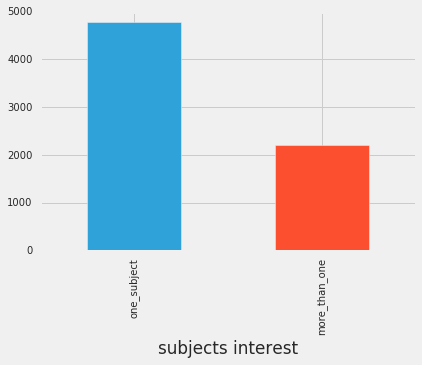

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
no_of_subjects_interest.plot.bar()
plt.xlabel("subjects interest")

In [44]:
Full_Stack=survey_data[survey_data["JobRoleInterest"].str.contains("Full-Stack Web Developer",na=False,regex=True)].shape[0]
Front_End=survey_data[survey_data["JobRoleInterest"].str.contains("Front-End Web Developer",na=False,regex=True)].shape[0]
Back_End=survey_data[survey_data["JobRoleInterest"].str.contains("Back-End Web Developer",na=False,regex=True)].shape[0]
Mobile_Developer=survey_data[survey_data["JobRoleInterest"].str.contains("Mobile Developer",na=False,regex=True)].shape[0]


In [45]:
Web_Mobile_Interest=pd.Series([Full_Stack,Front_End,Back_End,Mobile_Developer],index=["Full_Stack","Front_End","Back_End","Mobile_Developer"])

Full_Stack          4198
Front_End           3534
Back_End            2772
Mobile_Developer    2304
dtype: int64


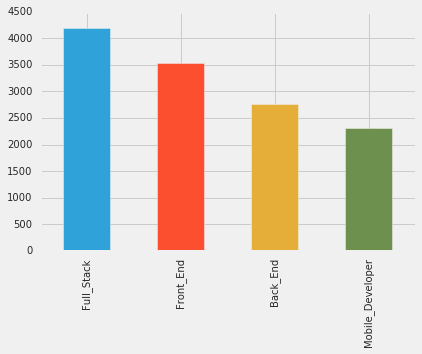

In [46]:
plt.style.use("fivethirtyeight")
Web_Mobile_Interest.plot.bar()
print(Web_Mobile_Interest)

From above graph it observes that most of the people are interested in Full stack web developer and less people interest in Mobile Developer

# New Coders - Locations and Densities
Let's begin with finding out where these new coders are located, and what are the densities (how many new coders there are) for each location. This should be a good start for finding out the best two markets to run our ads campaign in.

The data set provides information about the location of each participant at a country level. We can think of each country as an individual market, so we can frame our goal as finding the two best countries to advertise in.

We can start by examining the frequency distribution table of the CountryLive variable, which describes what country each participant lives in (not their origin country). We'll only consider those participants who answered what role(s) they're interested in, to make sure we work with a representative sample.



In [47]:
job_role_interested["CountryLive"].value_counts(normalize=True)*100

United States of America         45.700497
India                             7.721556
United Kingdom                    4.606610
Canada                            3.802281
Poland                            1.915765
Brazil                            1.886517
Germany                           1.828020
Australia                         1.637906
Russia                            1.491664
Ukraine                           1.301550
Nigeria                           1.228429
Spain                             1.126060
France                            1.096812
Romania                           1.038315
Netherlands (Holland, Europe)     0.950570
Italy                             0.906698
Serbia                            0.760456
Philippines                       0.760456
Greece                            0.672711
Ireland                           0.628839
South Africa                      0.570342
Mexico                            0.541094
Turkey                            0.526470
Singapore  

In [48]:
job_role_interested["CountryLive"].value_counts()

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Serbia                             52
Philippines                        52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Singapore                          34
Hungary                            34
New Zealand                        33
Argentina   

From above frequencey_distibution values it understands that out of 6992 people 3125 people(45% people) are living in USA and india stands 2nd in position 528 people(7 %).The remaining 50% people lives in another 135 countries other than india and USA.IT seems that india and usa are best palces for marketing

In [49]:
job_role_interested.loc[job_role_interested["JobRoleInterest"].str.contains("Mobile",na=False,regex=True),"CountryLive"].value_counts()

United States of America         1052
India                             173
United Kingdom                    106
Canada                             88
Brazil                             43
Germany                            40
Australia                          36
Nigeria                            32
Poland                             30
Italy                              27
Romania                            25
Spain                              23
Philippines                        21
Ukraine                            20
France                             18
Russia                             18
Greece                             18
Serbia                             16
Ireland                            15
Turkey                             15
Hungary                            14
New Zealand                        14
Singapore                          14
Sweden                             13
Croatia                            13
Netherlands (Holland, Europe)      13
Indonesia   

# We can continue by gifuring out how much money new coders are actually willing to spend on learning.Advertising within markets where most people are willing to learn for free is extremely unlikely to be profitable for us

The MoneyForLearning column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.


In [50]:
job_role_interested["MonthsProgramming"].replace(0,1,inplace=True)

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Some students answered that they had been learning to code for 0 months in MonthsProgramming (it might be that they had just started when they completed the survey). To avoid dividing by 0, replace all the values of 0 with 1.


In [51]:
job_role_interested["MonthlySpent"]=job_role_interested["MoneyForLearning"]/job_role_interested["MonthsProgramming"]

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [52]:
job_role_interested["MonthlySpent"]

1           13.333333
2          200.000000
3            0.000000
4            0.000000
6            0.000000
9            5.555556
11           0.000000
13                NaN
14                NaN
15           0.000000
16          16.666667
18          35.714286
19          17.857143
21         100.000000
22         285.714286
23         100.000000
28           2.416667
29                NaN
30          66.666667
31           0.000000
32         100.000000
33          83.333333
34                NaN
35           0.000000
37                NaN
40          25.000000
41           0.000000
42          50.000000
43           0.000000
52           0.000000
             ...     
18080       25.000000
18081             NaN
18088      182.000000
18089        0.000000
18090        0.000000
18093       27.777778
18097        0.000000
18098        1.222222
18099     1000.000000
18107      275.000000
18111      200.000000
18112        0.000000
18113        0.000000
18118        0.000000
18125     

In [53]:
job_role_interested["MonthlySpent"].value_counts(dropna=False)

 0.000000        3092
NaN               675
 50.000000        128
 25.000000        120
 16.666667        118
 100.000000       118
 33.333333        109
 8.333333         105
 20.000000         88
 10.000000         83
 83.333333         80
 166.666667        67
 12.500000         66
 4.166667          65
 5.000000          62
 200.000000        53
 500.000000        50
 66.666667         47
 41.666667         46
 250.000000        44
 1000.000000       43
 3.333333          38
 20.833333         37
 125.000000        36
 6.666667          35
 2.500000          33
 5.555556          31
 150.000000        31
 333.333333        31
 11.111111         31
                 ... 
 1.562500           1
 29.000000          1
 23.000000          1
 19.000000          1
 31.000000          1
 3.625000           1
 4.750000           1
 92.000000          1
 117.500000         1
 4.687500           1
 1142.857143        1
 0.900000           1
 866.666667         1
 1.344086           1
 1670.0000

selecting only the rows that dont have a null value for the new column

In [54]:
job_role_interested=job_role_interested[job_role_interested["MonthlySpent"].notna()]

In [55]:
job_role_interested.shape

(6317, 137)

# Remove also any rows that have null values in the CountryLive column.


In [56]:
job_role_interested=job_role_interested[job_role_interested["CountryLive"].notna()]

In [57]:
job_role_interested.shape

(6212, 137)

In [58]:
aggregations = {
    'MonthlySpent': { # work on the "duration" column
        'total_monthly_spent': 'sum',  # get the sum, and call this result 'total_duration'
        'average_monthly_spent': 'mean', # get mean, call result 'average_duration'
        'median_value': 'median'
    }
}


countries_mean=job_role_interested.groupby("CountryLive").agg(aggregations)
#cols=["United States of America","Inida","United Kingdom","Canada"]
#grouped_country[grouped_country["CountryLive"][cols]]
#country_means["MonthlySpent"][['United States of America','India','United Kingdom','Canada']]
countries_mean.loc[['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]


/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


MonthlySpent                        \
                         median_value average_monthly_spent   
CountryLive                                                   
United States of America     3.333333            227.997996   
India                        0.000000            135.100982   
United Kingdom               0.000000             45.534443   
Canada                       0.000000            113.510961   

                                              
                         total_monthly_spent  
CountryLive                                   
United States of America       668718.121808  
India                           62551.754651  
United Kingdom                  12704.109639  
Canada                          27242.630637

The results for the United Kingdom and Canada are a bit surprising relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom and Canada, or we have some outliers (maybe coming from wrong survey answers) making the mean too large for India, or too low for the UK and Canada. Or it might be that the results are correct.



# Dealing with Extreme Outliers¶
Let's use box plots to visualize the distribution of the money_per_month variable for each country.



In [59]:
four_countries=job_role_interested[job_role_interested["CountryLive"].str.contains('United States of America|India|United Kingdom|Canada')]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


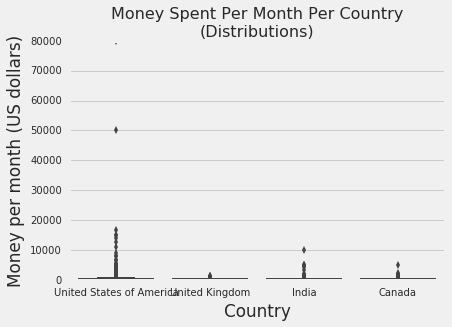

In [60]:
import seaborn as sns
plt.style.use("fivethirtyeight")
sns.boxplot(x="CountryLive",y="MonthlySpent",data=four_countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.show()

It's hard to see on the plot above if there's anything wrong with the data for the United Kingdom, India, or Canada, but we can see immediately that there's something really off for the US: two persons spend each month \$50000 or more for learning. This is not impossible, but it seems extremely unlikely, so we'll remove every value that goes over \$20,000 per month.



In [61]:
job_role_interested=job_role_interested[job_role_interested["MonthlySpent"]<20000]

In [62]:

countries_mean=job_role_interested.groupby("CountryLive").agg(aggregations)
#cols=["United States of America","Inida","United Kingdom","Canada"]
#grouped_country[grouped_country["CountryLive"][cols]]
#country_means["MonthlySpent"][['United States of America','India','United Kingdom','Canada']]
countries_mean.loc[['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]


/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


MonthlySpent                        \
                         median_value average_monthly_spent   
CountryLive                                                   
United States of America     3.333333            183.800110   
India                        0.000000            135.100982   
United Kingdom               0.000000             45.534443   
Canada                       0.000000            113.510961   

                                              
                         total_monthly_spent  
CountryLive                                   
United States of America       538718.121808  
India                           62551.754651  
United Kingdom                  12704.109639  
Canada                          27242.630637

In [63]:
four_countries=job_role_interested[job_role_interested["CountryLive"].str.contains('United States of America|India|United Kingdom|Canada')]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


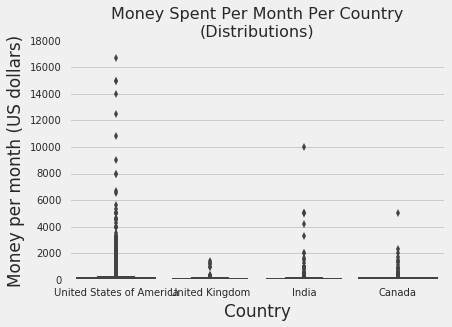

In [64]:
import seaborn as sns
plt.style.use("fivethirtyeight")
sns.boxplot(x="CountryLive",y="MonthlySpent",data=four_countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.show()

We can see a few extreme outliers for India (values over \$2500 per month), but it's unclear whether this is good data or not. Maybe these persons attended several bootcamps, which tend to be very expensive. Let's examine these two data points to see if we can find anything relevant.



In [65]:
# Inspect the extreme outliers for India
india_outliers = four_countries[
    (four_countries['CountryLive'] == 'India') & 
    (four_countries['MonthlySpent'] >= 2500)]
india_outliers


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpent
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


It seems that neither participant attended a bootcamp. Overall, it's really hard to figure out from the data whether these persons really spent that much money with learning. The actual question of the survey was "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?", so they might have misunderstood and thought university tuition is included. It seems safer to remove these two rows.



In [66]:
india_outliers.index

Int64Index([1728, 1755, 7989, 8126, 13398, 15587], dtype='int64')

In [67]:

# Remove the outliers for India
four_countries = four_countries.drop(index=india_outliers.index) # using the row labels


Looking back at the box plot above, we can also see more extreme outliers for the US (values over \$6000 per month). Let's examine these participants in more detail.



In [69]:
# Examine the extreme outliers for the US
us_outliers = four_countries[
    (four_countries['CountryLive'] == 'United States of America') & 
    (four_countries['MonthlySpent'] >= 6000)]

us_outliers


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpent
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


Out of these 11 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows where participants reported thay they spend \$6000 each month, but they have never attended a bootcamp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove every these eight outliers.

In the next code block, we'll remove respondents that:

Didn't attend bootcamps.
Had been programming for three months or less when at the time they completed the survey

In [74]:
# Remove the respondents who didn't attendent a bootcamp

no_bootcamp=four_countries[(four_countries["CountryLive"]=="United States of America") & (four_countries["MonthlySpent"]>=6000) & (four_countries["AttendedBootcamp"]==0)]

In [76]:
four_countries = four_countries.drop(no_bootcamp.index)


# Remove the respondents that had been programming for less than 3 months
less_than_3_months = four_countries[
    (four_countries['CountryLive'] == 'United States of America') & 
    (four_countries['MonthlySpent'] >= 6000) &
    (four_countries['MonthsProgramming'] <= 3)
]

four_countries = four_countries.drop(less_than_3_months.index)


Looking again at the last box plot above, we can also see an extreme outlier for Canada — a person who spends roughly \$5000 per month. Let's examine this person in more depth.



In [79]:
canada_outliers = four_countries[
    (four_countries['CountryLive'] == 'Canada') & 
    (four_countries['MonthlySpent'] > 4500)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpent
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


Here, the situation is similar to some of the US respondents — this participant had been programming for no more than two months when he completed the survey. He seems to have paid a large sum of money in the beginning to enroll in a bootcamp, and then he probably didn't spend anything for the next couple of months after the survey. We'll take the same approach here as for the US and remove this outlier.



In [80]:
# Remove the extreme outliers for Canada
four_countries = four_countries.drop(canada_outliers.index)


In [81]:
# Recompute mean sum of money spent by students each month
four_countries.groupby('CountryLive').mean()['MonthlySpent']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MonthlySpent, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


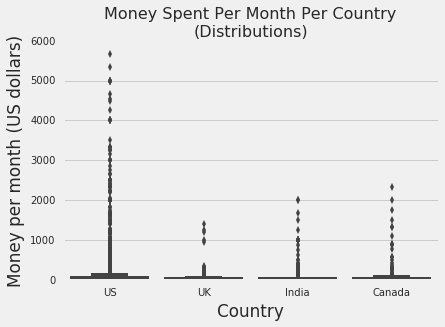

In [83]:
# Visualize the distributions again
sns.boxplot(y = 'MonthlySpent', x = 'CountryLive',
            data = four_countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()


Choosing the Two Best Markets¶
Obviously, one country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly \$143).

We sell subscriptions at a price of \$59 per month, and Canada seems to be the best second choice because people there are willing to pay roughly \$93 per month, compared to India (\$66) and the United Kingdom (\$45).

The data suggests strongly that we shouldn't advertise in the UK, but let's take a second look at India before deciding to choose Canada as our second best choice:

$59 doesn't seem like an expensive sum for people in India since they spend on average \$66 each month.
We have almost twice as more potential customers in India than we have in Canada:

In [84]:
# Frequency table for the 'CountryLive' column
four_countries['CountryLive'].value_counts(normalize = True) * 100


United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

So it's not crystal clear what to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

At this point, it seems that we have several options:

Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:

60% for the US, 25% for India, 15% for Canada.
50% for the US, 30% for India, 20% for Canada; etc.
Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:

70% for the US, and 30% for India.
65% for the US, and 35% for Canada; etc.
Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.



# Conclusion¶
In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.